In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
freq = 16000
x = np.arange(0.001*freq)
x_sin = np.sin(x)
print(x)
print(x_sin)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784]


[ 1.93568748+0.j          2.29125543+0.14361623j  5.08180973+0.61023059j
 -5.08167144-0.84376945j -1.38048534-0.26642799j -0.74843139-0.14409106j
 -0.51634241-0.08160049j -0.41858559-0.03762368j -0.39078547+0.j
 -0.41858559+0.03762368j -0.51634241+0.08160049j -0.74843139+0.14409106j
 -1.38048534+0.26642799j -5.08167144+0.84376945j  5.08180973-0.61023059j
  2.29125543-0.14361623j]
[1.93568748 2.29575196 5.11831726 5.15124562 1.40596005 0.76217569
 0.52275054 0.42027305 0.39078547 0.42027305 0.52275054 0.76217569
 1.40596005 5.15124562 5.11831726 2.29575196]
(16,)


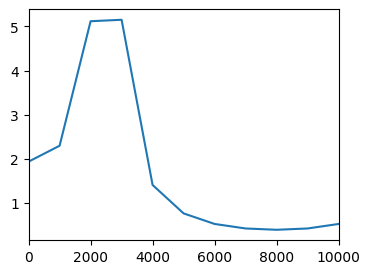

In [3]:
N_x = len(x_sin)
fft_sin = np.fft.fft(x_sin)
plt.figure(figsize=(4,3))
plt.plot(np.linspace(0, freq*(N_x-1)/N_x, N_x), np.abs(fft_sin))
plt.xlim([0, 10000])
print(fft_sin)
print(np.abs(fft_sin))
print(fft_sin.shape)

[1.88586131e-01 7.69009338e-01 3.18295932e+00 3.37303350e+00
 9.37504840e-01 9.84709427e-02 2.63370601e-02 8.29919317e-03
 1.97328125e-03 8.29919317e-03 2.63370601e-02 9.84709427e-02
 9.37504840e-01 3.37303350e+00 3.18295932e+00 7.69009338e-01]
(16,)


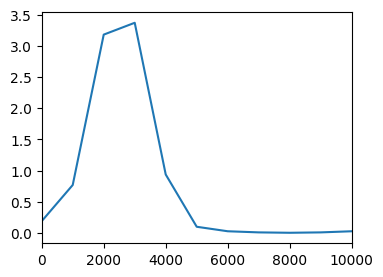

In [4]:
N_x = len(x_sin)
weight = []
for i in range(N_x):
    weight.append(0.56-0.46*np.cos((2.*np.pi*float(i))/(float(N_x)-1.)))
max_x = np.max(weight)
min_x = np.min(weight)
for i in range(N_x):
    weight[i] = (weight[i]-min_x)/(max_x - min_x)
fft_sin = np.fft.fft(x_sin*weight)
plt.figure(figsize=(4,3))
plt.plot(np.linspace(0, freq*(N_x-1)/N_x, N_x), np.abs(fft_sin))
plt.xlim([0, 10000])
##print(fft_sin)
print(np.abs(fft_sin))
print(fft_sin.shape)

[-0.01674855+0.j         -0.51036624+0.10362184j  3.30095606+0.15414736j
 -3.39078501-0.78496444j  0.66485522+0.33458685j  0.0127284 +0.04098549j
 -0.02505092+0.01108062j -0.02922961+0.00322758j -0.02946725+0.j
 -0.02922961-0.00322758j -0.02505092-0.01108062j  0.0127284 -0.04098549j
  0.66485522-0.33458685j -3.39078501+0.78496444j  3.30095606-0.15414736j
 -0.51036624-0.10362184j]
[0.01674855 0.5207794  3.30455327 3.48045861 0.74429888 0.04291646
 0.02739213 0.02940727 0.02946725 0.02940727 0.02739213 0.04291646
 0.74429888 3.48045861 3.30455327 0.5207794 ]
(16,)


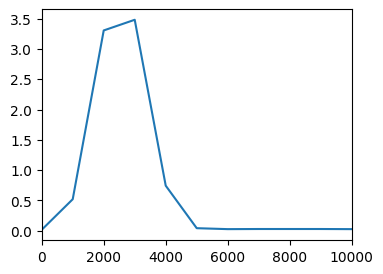

In [5]:
N_x = len(x_sin)
weight = np.hamming(N_x)
fft_sin = np.fft.fft(x_sin*weight)
plt.figure(figsize=(4,3))
plt.plot(np.linspace(0, freq*(N_x-1)/N_x, N_x), np.abs(fft_sin))
plt.xlim([0, 10000])
print(fft_sin)
print(np.abs(fft_sin))
print(fft_sin.shape)

In [6]:
from IPython.display import Audio
from scipy.io import wavfile

In [7]:
filename = 'yes1.wav'
data_rate, data_audio_tensor = wavfile.read(filename)
Audio(rate=data_rate, data=data_audio_tensor)

In [8]:
##print(data_audio_tensor.tolist())

[  47.05023747   33.82719949   11.7524921    57.11256154   80.2167685
  122.35629097  172.7222949    53.75160615  115.84132488  117.19549081
  152.50260147  121.56724039   89.89872254   47.49330024   57.86935591
   87.51860687   59.14691016   43.52239025   17.73635245   17.07966081
   67.55544742  105.34067972  100.16466423   96.63161095   63.11452161
   33.05627579   29.08535282   54.34554151   39.84242512   14.26122866
   54.43386326   58.49875472   29.80580725   66.21909774   70.23030543
   51.93125469   56.25766331   41.06974069    8.74657057   36.23027831
   76.43925087   56.06219631   27.87543851   15.79014082    2.12949322
   31.99756882   51.40391066   59.29820885   67.39653518   35.45476141
   15.78479876   44.26426114   54.44592498   35.36845766   27.19609986
   23.986482     63.72421771   27.5727457    56.21312063   22.36463237
   24.13475205   34.03257909   12.05114405   15.18053371   14.89508311
   55.99815051   18.71183974   67.2116251    59.78042524   11.19880619
   22.8

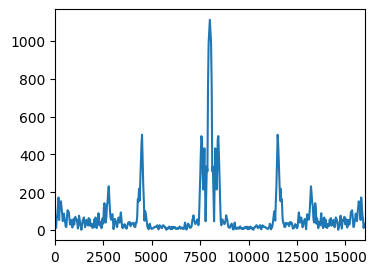

In [9]:
x = data_audio_tensor[0:512]
N_x = len(x)
weight = []
for i in range(N_x):
    weight.append(0.56-0.46*np.cos((2.*np.pi*float(i))/(float(N_x)-1.)))
max_x = np.max(weight)
min_x = np.min(weight)
for i in range(N_x):
    weight[i] = (weight[i]-min_x)/(max_x - min_x)
    
fft_ = np.fft.fft(x*weight)
plt.figure(figsize=(4,3))
plt.plot(np.linspace(0, freq*(N_x-1)/N_x, N_x), np.abs(fft_))
plt.xlim([0, 16000])
##print(weight[0:5])
##print(fft_)
print(np.abs(fft_))
print(fft_.shape)

[  53.60580945   31.22106973    7.51024227   61.50991462   77.59134473
  122.32795247  182.95709604   54.1115157   126.23500979  116.59032537
  161.76605948  118.45305899   88.96432435   52.21346391   61.57400576
   89.01534152   60.67424167   42.8068315    19.54415497   18.37934916
   65.22001647  116.0002875   102.33821657   98.22879293   63.34325411
   33.72965344   26.18091191   57.75962742   38.97915024   14.01033999
   57.64680723   56.99116271   30.26244001   72.98438854   68.13616229
   54.89552805   59.60960942   42.02434511   11.45697585   33.23977679
   80.74381219   55.66766338   28.7236247    18.48985408    7.25677066
   35.82888516   50.54265754   58.85994077   68.89282874   36.38101364
   17.45221114   42.57978157   57.61278269   33.24165511   32.83420682
   25.56614973   65.33225937   30.71531929   63.2285809    18.0655683
   22.39445483   38.05014439   10.35924066   16.53381819   12.25819617
   59.17966685   23.05193269   73.55415152   58.51328235   10.22850125
   26.7

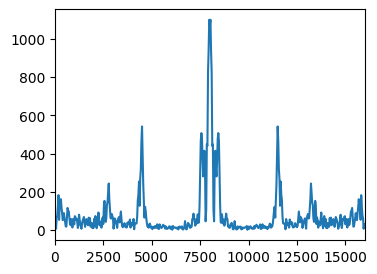

In [10]:
N_x = len(x)
weight = np.hamming(N_x)
fft_ = np.fft.fft(x*weight)
plt.figure(figsize=(4,3))
plt.plot(np.linspace(0, freq*(N_x-1)/N_x, N_x), np.abs(fft_))
plt.xlim([0, 16000])
##print(fft_)
print(np.abs(fft_))
print(fft_sin.shape)

In [21]:
def hamming(weight, length):
    for i in range(length):
        weight.append(0.56-0.46*np.cos((2.*np.pi*float(i))/(float(length)-1.)))
    max_x = np.max(weight)
    min_x = np.min(weight)
    for i in range(length):
        weight[i] = (weight[i]-min_x)/(max_x - min_x)
x = data_audio_tensor[0:15872]
##x = data_audio_tensor[0:512]
start_ = 0
step = 256
window_size = 512
fft_arr = []
while(start_ != 15360):
    window = x[start_:(start_+window_size)]
    length = len(window)
    weight = []
    hamming(weight, length)
    fft_ = np.fft.fft(window*weight)
##    fft_arr.append(np.abs(fft_))
    fft_arr.append(np.abs(fft_[:int(window_size/2)]))
    ##fft_arr.append(np.abs(fft_))
    start_+=step

for i in range(len(fft_arr)):
    if(len(fft_arr[i]) != len(fft_arr[0])):
        print("wrong size")

print(str(len(fft_arr))+" "+str(len(fft_arr[0])))
print(fft_arr[1])
print("\n")
print(fft_arr[2])

60 256
[4.21120089e+01 3.30495850e+01 2.28960866e+01 1.53367438e+01
 2.83680640e+01 4.28012553e+01 7.84868080e+01 1.89818715e+02
 1.53792043e+02 4.67080949e+01 1.02528888e+02 9.42813672e+01
 9.96843376e+01 1.31663209e+02 1.28551455e+02 4.03380922e+01
 8.76872119e+01 7.60337013e+01 8.26764930e+01 4.74417880e+01
 5.19687722e+01 1.04025266e+02 9.28465208e+01 2.16412553e+01
 4.60005147e+01 7.13096000e+01 4.92256197e+01 3.14953612e+01
 2.57781750e+01 2.48289993e+01 2.92562483e+01 2.96263970e+01
 1.10081350e+01 2.81471826e+01 4.89331313e+01 7.17917332e+01
 3.59847522e+01 1.42431672e+01 5.25204260e+01 5.23650373e+01
 5.23250060e+01 4.48529145e+01 7.94361863e+01 7.19832070e+01
 2.84310608e+01 1.09680285e+01 3.15186975e+01 2.18589073e+01
 1.52831001e+01 2.32485009e+01 2.29958730e+01 2.89922579e+01
 2.77237398e+01 4.90550264e+01 6.30911653e+01 3.20948371e+01
 1.51696664e+01 3.94215720e+01 2.67170397e+01 2.51030519e+01
 3.68035099e+01 2.28325491e+01 4.42971867e+00 4.32750368e+01
 3.81390303e+01 1

In [22]:
import librosa
import tensorflow as tf
weight = np.hamming(len(x))
tf_stft = tf.signal.stft(x/1.0,frame_length=512, frame_step=256, window_fn=tf.signal.hamming_window,)
tf_stft_abs = np.abs(tf_stft)
print(tf_stft_abs.shape)
print(tf_stft_abs[1])

(61, 257)
[3.78945420e+01 3.93144480e+01 2.14336134e+01 1.51311260e+01
 3.96095519e+01 5.21610508e+01 7.92966639e+01 1.96759920e+02
 1.59985729e+02 4.64627301e+01 1.12430010e+02 9.53157829e+01
 9.96924970e+01 1.29236389e+02 1.37779144e+02 3.06660863e+01
 9.52110258e+01 7.64664534e+01 8.52774808e+01 5.13670699e+01
 5.36970117e+01 1.11196743e+02 9.45690204e+01 2.00122192e+01
 4.54450994e+01 7.40801904e+01 4.81927308e+01 3.28245277e+01
 2.97978388e+01 2.71497062e+01 2.73119748e+01 3.40832599e+01
 1.30085338e+01 3.00680633e+01 4.46652438e+01 7.96455260e+01
 3.48042449e+01 1.12012129e+01 5.86757151e+01 4.67440461e+01
 5.84341862e+01 3.96835040e+01 8.43240066e+01 7.23218164e+01
 2.91292405e+01 1.20839224e+01 3.25360872e+01 2.11386443e+01
 1.33168244e+01 2.83234703e+01 2.48351940e+01 2.55507503e+01
 3.58760330e+01 4.81705622e+01 6.53964702e+01 3.20518618e+01
 2.11443871e+01 3.33261690e+01 3.65042179e+01 3.50415853e+01
 3.26102569e+01 2.71614289e+01 1.11743184e+01 3.67669695e+01
 4.93653553e+0

(0.0, 11000.0)

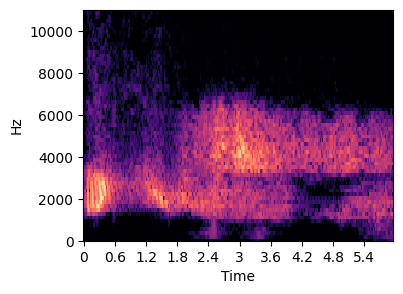

In [23]:
fig, ax = plt.subplots(figsize=(4, 3))
librosa.display.specshow(
    librosa.amplitude_to_db(tf_stft_abs),
    y_axis="hz",
    x_axis="time",
    ax=ax,
    fmax=6000
)
plt.ylim([0, 11000])

(0.0, 11000.0)

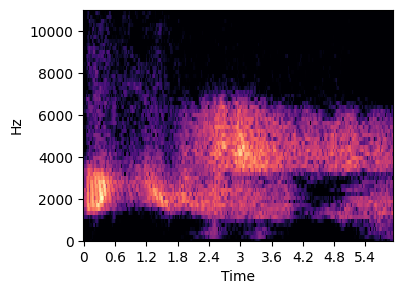

In [24]:
fig, ax = plt.subplots(figsize=(4, 3))
librosa.display.specshow(
    librosa.amplitude_to_db(fft_arr),
    y_axis="hz",
    x_axis="time",
    ax=ax,
    fmax=6000
)
plt.ylim([0, 11000])

In [27]:
def hamming(length):
    weight = []
    for i in range(length):
        weight.append(0.56-0.46*np.cos((2.*np.pi*float(i))/(float(length)-1.)))
    max_x = np.max(weight)
    min_x = np.min(weight)
    for i in range(length):
        weight[i] = (weight[i]-min_x)/(max_x - min_x)
    return weight

def stft(data, num_of_inputs, window_size, hop_length):
    num_of_ffts = (num_of_inputs - window_size)/hop_length
    n_fft = (window_size/2)+1
    fft_arr = []
    counter = 0
    pointer = 0
    while(counter != num_of_ffts):
        window = data[pointer:(pointer+window_size)]
        weight = hamming(window_size)
        fft_ = np.fft.fft(window*weight)
        fft_arr.append(np.abs(fft_[:int(n_fft)]))
        pointer+=hop_length
        counter+=1
    return fft_arr

def mel_spec(data, num_of_inputs, window_size, hop_length, n_mels, sample_rate):
    num_of_ffts = (num_of_inputs - window_size)/hop_length
    n_ffts = (window_size/2)+1

    lower_freq = 300
    upper_freq = 8000

    mel_lower_freq = 1125*np.log(1+lower_freq/700)
    mel_upper_freq = 1125*np.log(1+upper_freq/700)
    mel_gap = (mel_upper_freq - mel_lower_freq)/(n_mels+1)

    ## Define the filterbank
    mel_value = mel_lower_freq
    fbin = []
    counter = 0
    while(counter<n_mels+2):
        mel_to_hz = 700*(np.exp(mel_value/1125)-1)

        rounding_freq = np.floor((n_ffts*mel_to_hz)/sample_rate)
        fbin.append(rounding_freq)
        mel_value+=mel_gap

        counter+=1

    filterbank = np.zeros((n_mels, int(n_ffts)))
    for m in range(1, n_mels+1):
        f_min = int(fbin[m-1])
        f_mid = int(fbin[m])
        f_max = int(fbin[m+1])

        for k in range(f_min, f_mid):
            filterbank[m-1, k] = (k - fbin[m-1])/(fbin[m] - fbin[m-1])
        for k in range(f_mid, f_max):
            filterbank[m-1, k] = (fbin[m+1] - k)/(fbin[m+1] - fbin[m])
    
    stft_arr = stft(data, num_of_inputs, window_size, hop_length)
    mel_spec_arr = np.dot(np.array(stft_arr), filterbank.T)
    

    return mel_spec_arr

[[  122.35629097   172.7222949     53.75160615 ...   349.09813952
    152.79758891   197.60415462]
 [   42.80125531    78.48680804   189.81871526 ... 24203.01776815
   5546.52523229  1107.40252434]
 [   51.24438911   106.57824397   196.22458986 ... 34089.75979286
   8697.85202812  2518.38931305]
 ...
 [  109.8066689    416.19897426   240.31190718 ...   262.50257494
    442.99486169   341.95589379]
 [  220.39644838   101.02038439   125.80826771 ...   309.13566214
    493.90732759   276.22024112]
 [  300.83743331   356.54492017   205.2670691  ...   225.46914097
    471.61067362   304.35710494]]

1788572.3755498447
0.0
[[-41.64880215 -40.15158119 -45.22115073 ... -37.09558985 -40.68390018
  -39.56710447]
 [-46.21050012 -43.57709852 -39.74167489 ... -18.68636999 -25.08485526
  -32.0820101 ]
 [-45.42860199 -42.24837958 -39.59753089 ... -17.19882578 -23.13094504
  -28.51383651]
 ...
 [-42.11877802 -36.33205513 -38.71731229 ... -38.33372951 -36.0610783
  -37.18536425]
 [-39.09301927 -42.48097

(0.0, 11000.0)

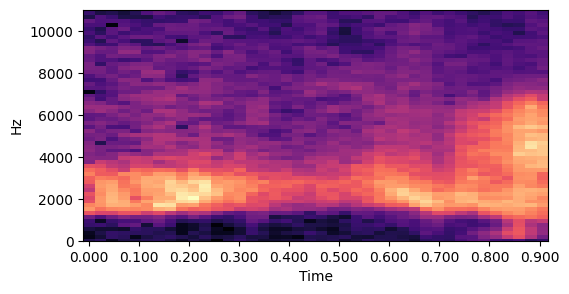

In [29]:
import sys
mel_spec_arr = mel_spec(x, 15872, 512, 256, 40, 16000)
print(mel_spec_arr)
print()
ref_value = np.max(mel_spec_arr )
print(ref_value)
##mel_spec_arr = np.square(mel_spec_arr)
##ref_value = ref_value**2
mel_spec_arr_db = 10*np.log10(np.maximum(sys.float_info.min, mel_spec_arr))
mel_spec_arr_db -= 10*np.log10(np.maximum(sys.float_info.min, ref_value))
print(mel_spec_arr_db.max())
##mel_spec_arr_db = np.maximum(mel_spec_arr_db, mel_spec_arr_db.max()-80)
##mel_spec_arr = librosa.amplitude_to_db(mel_spec(x, 15872, 512, 256, 40, 16000), ref=np.max)
print(mel_spec_arr_db)
fig, ax = plt.subplots(figsize=(6, 3))
librosa.display.specshow(
    mel_spec_arr_db,
    y_axis="hz",
    x_axis="time",
    ax=ax,
    fmax=6000
)
plt.ylim([0, 11000])